In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [210]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [211]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [212]:
x = data.iloc[:,0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [213]:
y = data['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

<Axes: >

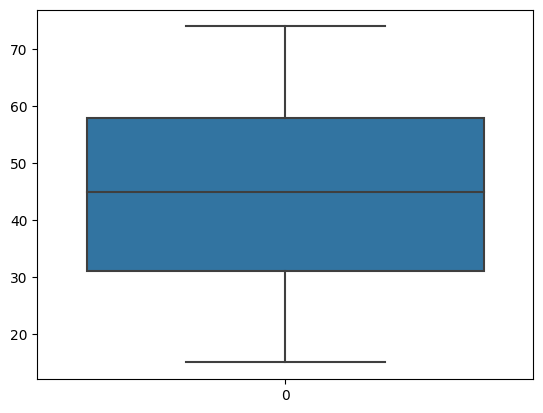

In [214]:
sns.boxplot(data['Age'])

<Axes: >

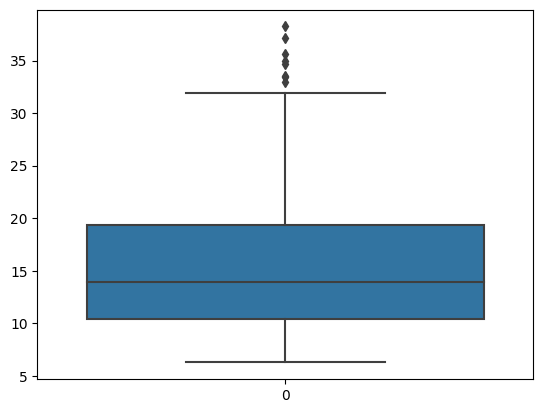

In [215]:
sns.boxplot(data['Na_to_K'])

In [216]:
q1 = data.Na_to_K.quantile(.25)
q3 = data.Na_to_K.quantile(.75)
IQR = q3 - q1
print(IQR)

ul = q3 + 1.5*IQR
print(ul)
print(data['Na_to_K'].median())


8.9345
32.78175
13.9365


In [217]:
data['Na_to_K'] = np.where(data['Na_to_K']>ul,13.9365,data['Na_to_K'])

In [218]:
q1 = data.Na_to_K.quantile(.25)
q3 = data.Na_to_K.quantile(.75)
IQR = q3 - q1
print(IQR)

ul = q3 + 1.5*IQR
print(ul)
print(data['Na_to_K'].median())


8.409000000000002
31.468000000000004
13.93575


In [219]:
data['Na_to_K'] = np.where(data['Na_to_K']>ul,13.9365,data['Na_to_K'])

<Axes: >

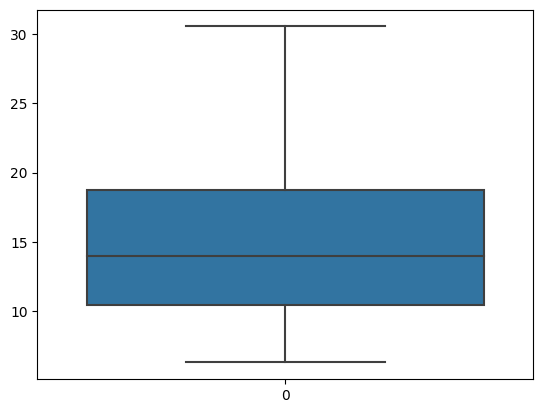

In [220]:
sns.boxplot(data['Na_to_K'])

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=20)


xtrain.shape, xtest.shape, ytrain.shape, ytest.shape
ytrain

12     DrugY
129    drugX
51     drugX
153    drugX
88     DrugY
       ...  
148    drugX
137    drugA
156    drugA
15     DrugY
99     DrugY
Name: Drug, Length: 150, dtype: object

In [222]:

scaler = MinMaxScaler()
xtrain['BP'] = xtrain['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
xtrain['Cholesterol'] = xtrain['Cholesterol'].replace({'NORMAL': 0, 'HIGH': 1})
xtrain['Sex'] = xtrain['Sex'].replace({'M' : 0, 'F' : 1})
xtrain[['Age','Na_to_K']] = scaler.fit_transform(xtrain[['Age','Na_to_K']])
xtrain


,Age,Sex,BP,Cholesterol,Na_to_K
12,0.474576,0,0,1,0.284790
129,0.288136,1,1,1,0.037776
51,0.881356,0,1,0,0.144756
153,0.966102,1,0,0,0.261836
88,0.372881,1,2,0,0.526049
...,...,...,...,...,...
148,0.779661,1,0,0,0.033492
137,0.338983,1,2,1,0.207174
156,0.271186,0,2,0,0.155044
15,0.016949,1,2,0,0.289168


In [247]:
xtest['BP'] = xtest['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
xtest['Cholesterol'] = xtest['Cholesterol'].replace({'NORMAL': 0, 'HIGH': 1})
xtest['Sex'] = xtest['Sex'].replace({'M' : 0, 'F' : 1})
xtest[['Age','Na_to_K']] = scaler.transform(xtest[['Age','Na_to_K']])

In [242]:


le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)
ytest

array([1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 4, 0, 0, 1, 4,
       0, 1, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 2, 3, 1, 4, 4, 4, 4, 0, 0,
       4, 0, 1, 0, 4, 0])

In [225]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input


#ANN model

model = Sequential()
model.add(Dense(5, activation='relu'))

# Hidden layers
model.add(Dense(64,input_dim = 5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(18, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))

# Output layer
model.add(Dense(5,activation='softmax'))



In [226]:
# Create the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [228]:
model.fit(xtrain,ytrain,epochs=60,batch_size=20,validation_data=(xtest,ytest))

Epoch 1/60
8/8 [==============================] - 0s 9ms/step - loss: 0.5052 - accuracy: 0.8000 - val_loss: 0.8149 - val_accuracy: 0.6200
Epoch 2/60
8/8 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7733 - val_loss: 0.7652 - val_accuracy: 0.6400
Epoch 3/60
8/8 [==============================] - 0s 6ms/step - loss: 0.5185 - accuracy: 0.7867 - val_loss: 0.8505 - val_accuracy: 0.5600
Epoch 4/60
8/8 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7733 - val_loss: 0.7886 - val_accuracy: 0.6200
Epoch 5/60
8/8 [==============================] - 0s 7ms/step - loss: 0.5042 - accuracy: 0.7867 - val_loss: 0.7908 - val_accuracy: 0.6400
Epoch 6/60
8/8 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7933 - val_loss: 0.7726 - val_accuracy: 0.6400
Epoch 7/60
8/8 [==============================] - 0s 7ms/step - loss: 0.4824 - accuracy: 0.7933 - val_loss: 0.7729 - val_accuracy: 0.6200
Epoch 8/60
8/8 [==================

In [232]:
xtest.describe(include= 'all')

,Age,Sex,BP,Cholesterol,Na_to_K
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.513559,0.520000,1.040000,0.600000,0.280994
std,0.291448,0.504672,0.807111,0.494872,0.193273
min,0.000000,0.000000,0.000000,0.000000,0.012946
25%,0.322034,0.000000,0.000000,0.000000,0.133998
50%,0.550847,1.000000,1.000000,1.000000,0.237132
75%,0.707627,1.000000,2.000000,1.000000,0.386054
max,1.000000,1.000000,2.000000,1.000000,0.966883


In [245]:
data.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [248]:
xtest

,Age,Sex,BP,Cholesterol,Na_to_K
150,0.576271,0,2,0,0.076021
28,0.406780,1,0,0,0.513728
13,1.000000,1,0,1,0.458847
178,0.406780,0,1,1,0.303334
109,0.135593,0,1,1,0.330884
168,0.610169,1,0,0,0.523297
177,0.169492,0,1,1,0.398461
196,0.016949,0,0,1,0.179405
47,0.898305,0,0,1,0.125774
195,0.694915,1,0,1,0.165676


In [250]:
from sklearn.preprocessing import MinMaxScaler

random_data = np.array([[0.11, 1, 1, 0, 0.07]])

predictions = model.predict(random_data)
print(predictions)
# Get the predicted drug class
predicted_class = np.argmax(predictions)

# Map the predicted class back to the drug name
drug_mapping = {0: 'DrugY', 1: 'drugA', 2: 'drugB', 3: 'drugC', 4: 'drugX'}
predicted_drug = drug_mapping[predicted_class]

# Print the predicted drug class
print("Predicted Drug Class:", predicted_drug)

1/1 [==============================] - 0s 16ms/step
[[2.80711596e-04 1.18416225e-04 2.21191613e-06 1.98980615e-01
  8.00618052e-01]]
Predicted Drug Class: drugX
